In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer


In [2]:
creditcard_df = pd.read_csv('CC GENERAL.csv')


In [3]:
creditcard_df.shape


(8950, 18)

In [4]:
creditcard_df.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
creditcard_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
creditcard_df.describe()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
creditcard_df[creditcard_df['ONEOFF_PURCHASES'] == 40761.250000]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
550,C10574,11547.52001,1.0,49039.57,40761.25,8278.32,558.166886,1.0,1.0,0.916667,0.083333,1,101,22500.0,46930.59824,2974.069421,0.25,12


In [8]:
creditcard_df['CASH_ADVANCE'].max()


47137.21176

In [9]:
creditcard_df[creditcard_df['CASH_ADVANCE'] == 47137.21176]


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
2159,C12226,10905.05381,1.0,431.93,133.5,298.43,47137.21176,0.583333,0.25,0.5,1.0,123,21,19600.0,39048.59762,5394.173671,0.0,12


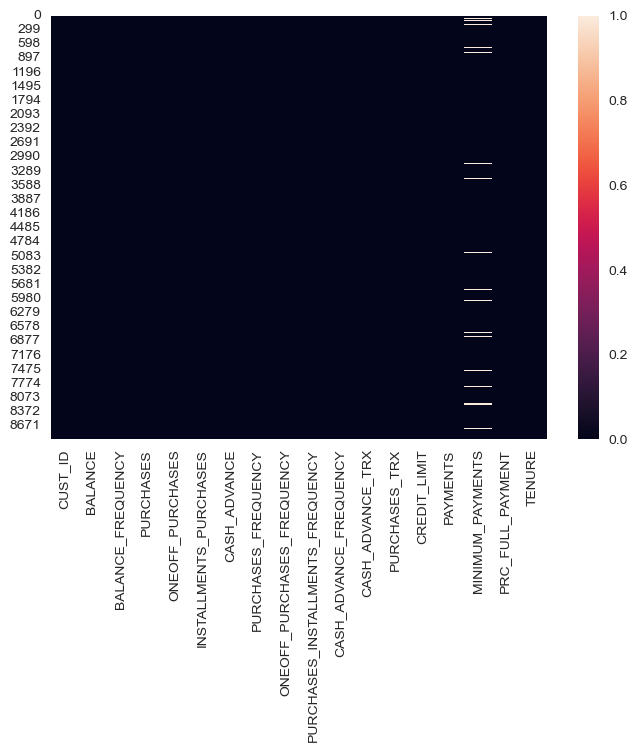

In [10]:
sns.heatmap(creditcard_df.isnull());


In [11]:
creditcard_df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [12]:
creditcard_df['MINIMUM_PAYMENTS'].mean()


864.2065423050828

In [13]:
creditcard_df.loc[(creditcard_df['MINIMUM_PAYMENTS'].isnull() == True), 'MINIMUM_PAYMENTS'] = creditcard_df['MINIMUM_PAYMENTS'].mean()


In [14]:
creditcard_df['CREDIT_LIMIT'].mean()


4494.449450364621

In [15]:
creditcard_df.loc[(creditcard_df['CREDIT_LIMIT'].isnull() == True), 'CREDIT_LIMIT'] = creditcard_df['CREDIT_LIMIT'].mean()


In [16]:
creditcard_df.isnull().sum()


CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

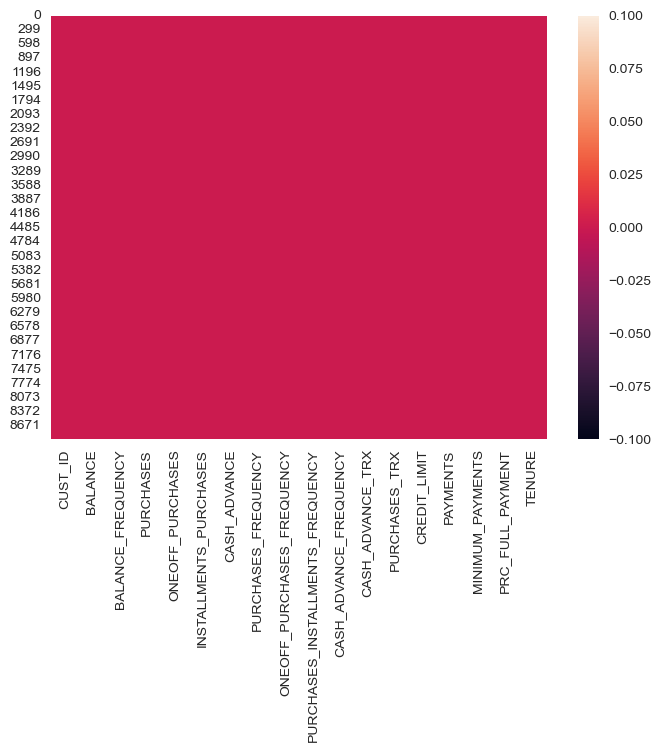

In [17]:
sns.heatmap(creditcard_df.isnull());


In [18]:
creditcard_df.duplicated().sum()


0

In [19]:
creditcard_df.drop('CUST_ID', axis = 1, inplace = True)


In [20]:
creditcard_df.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [21]:
creditcard_df.columns


Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')

In [22]:
len(creditcard_df.columns)


17

C:\Users\himan\AppData\Local\Temp\ipykernel_8268\1998933226.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
C:\Users\himan\AppData\Local\Temp\ipykernel_8268\1998933226.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(creditcard_df[credi

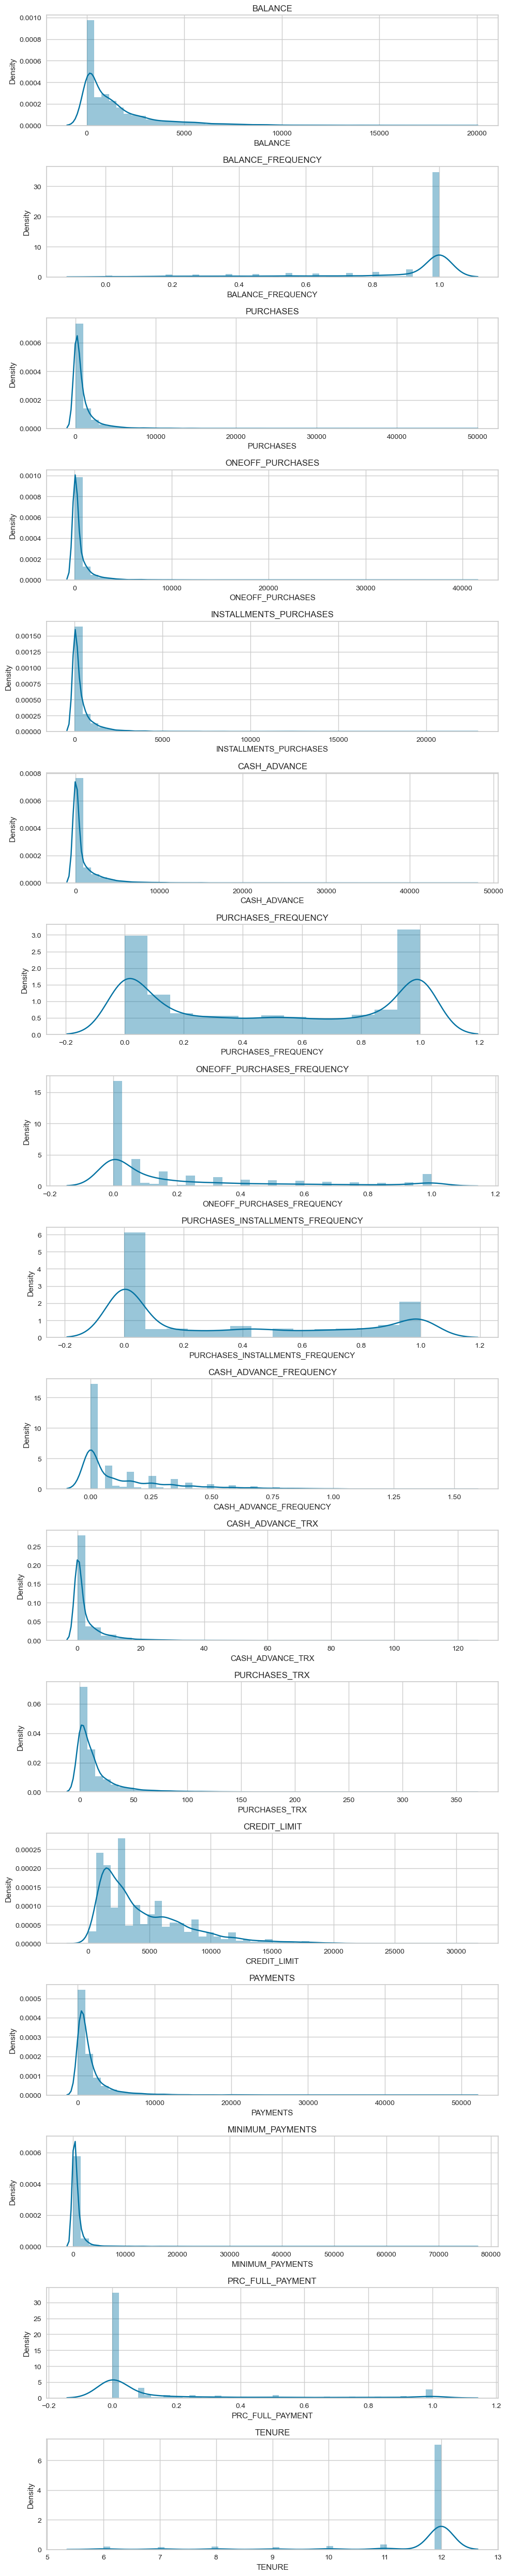

In [23]:
plt.figure(figsize=(10,50))
for i in range(len(creditcard_df.columns)):
    plt.subplot(17, 1, i + 1)
    sns.distplot(creditcard_df[creditcard_df.columns[i]], kde = True)
    plt.title(creditcard_df.columns[i])
plt.tight_layout()

In [24]:
correlations = creditcard_df.corr()


<Axes: >

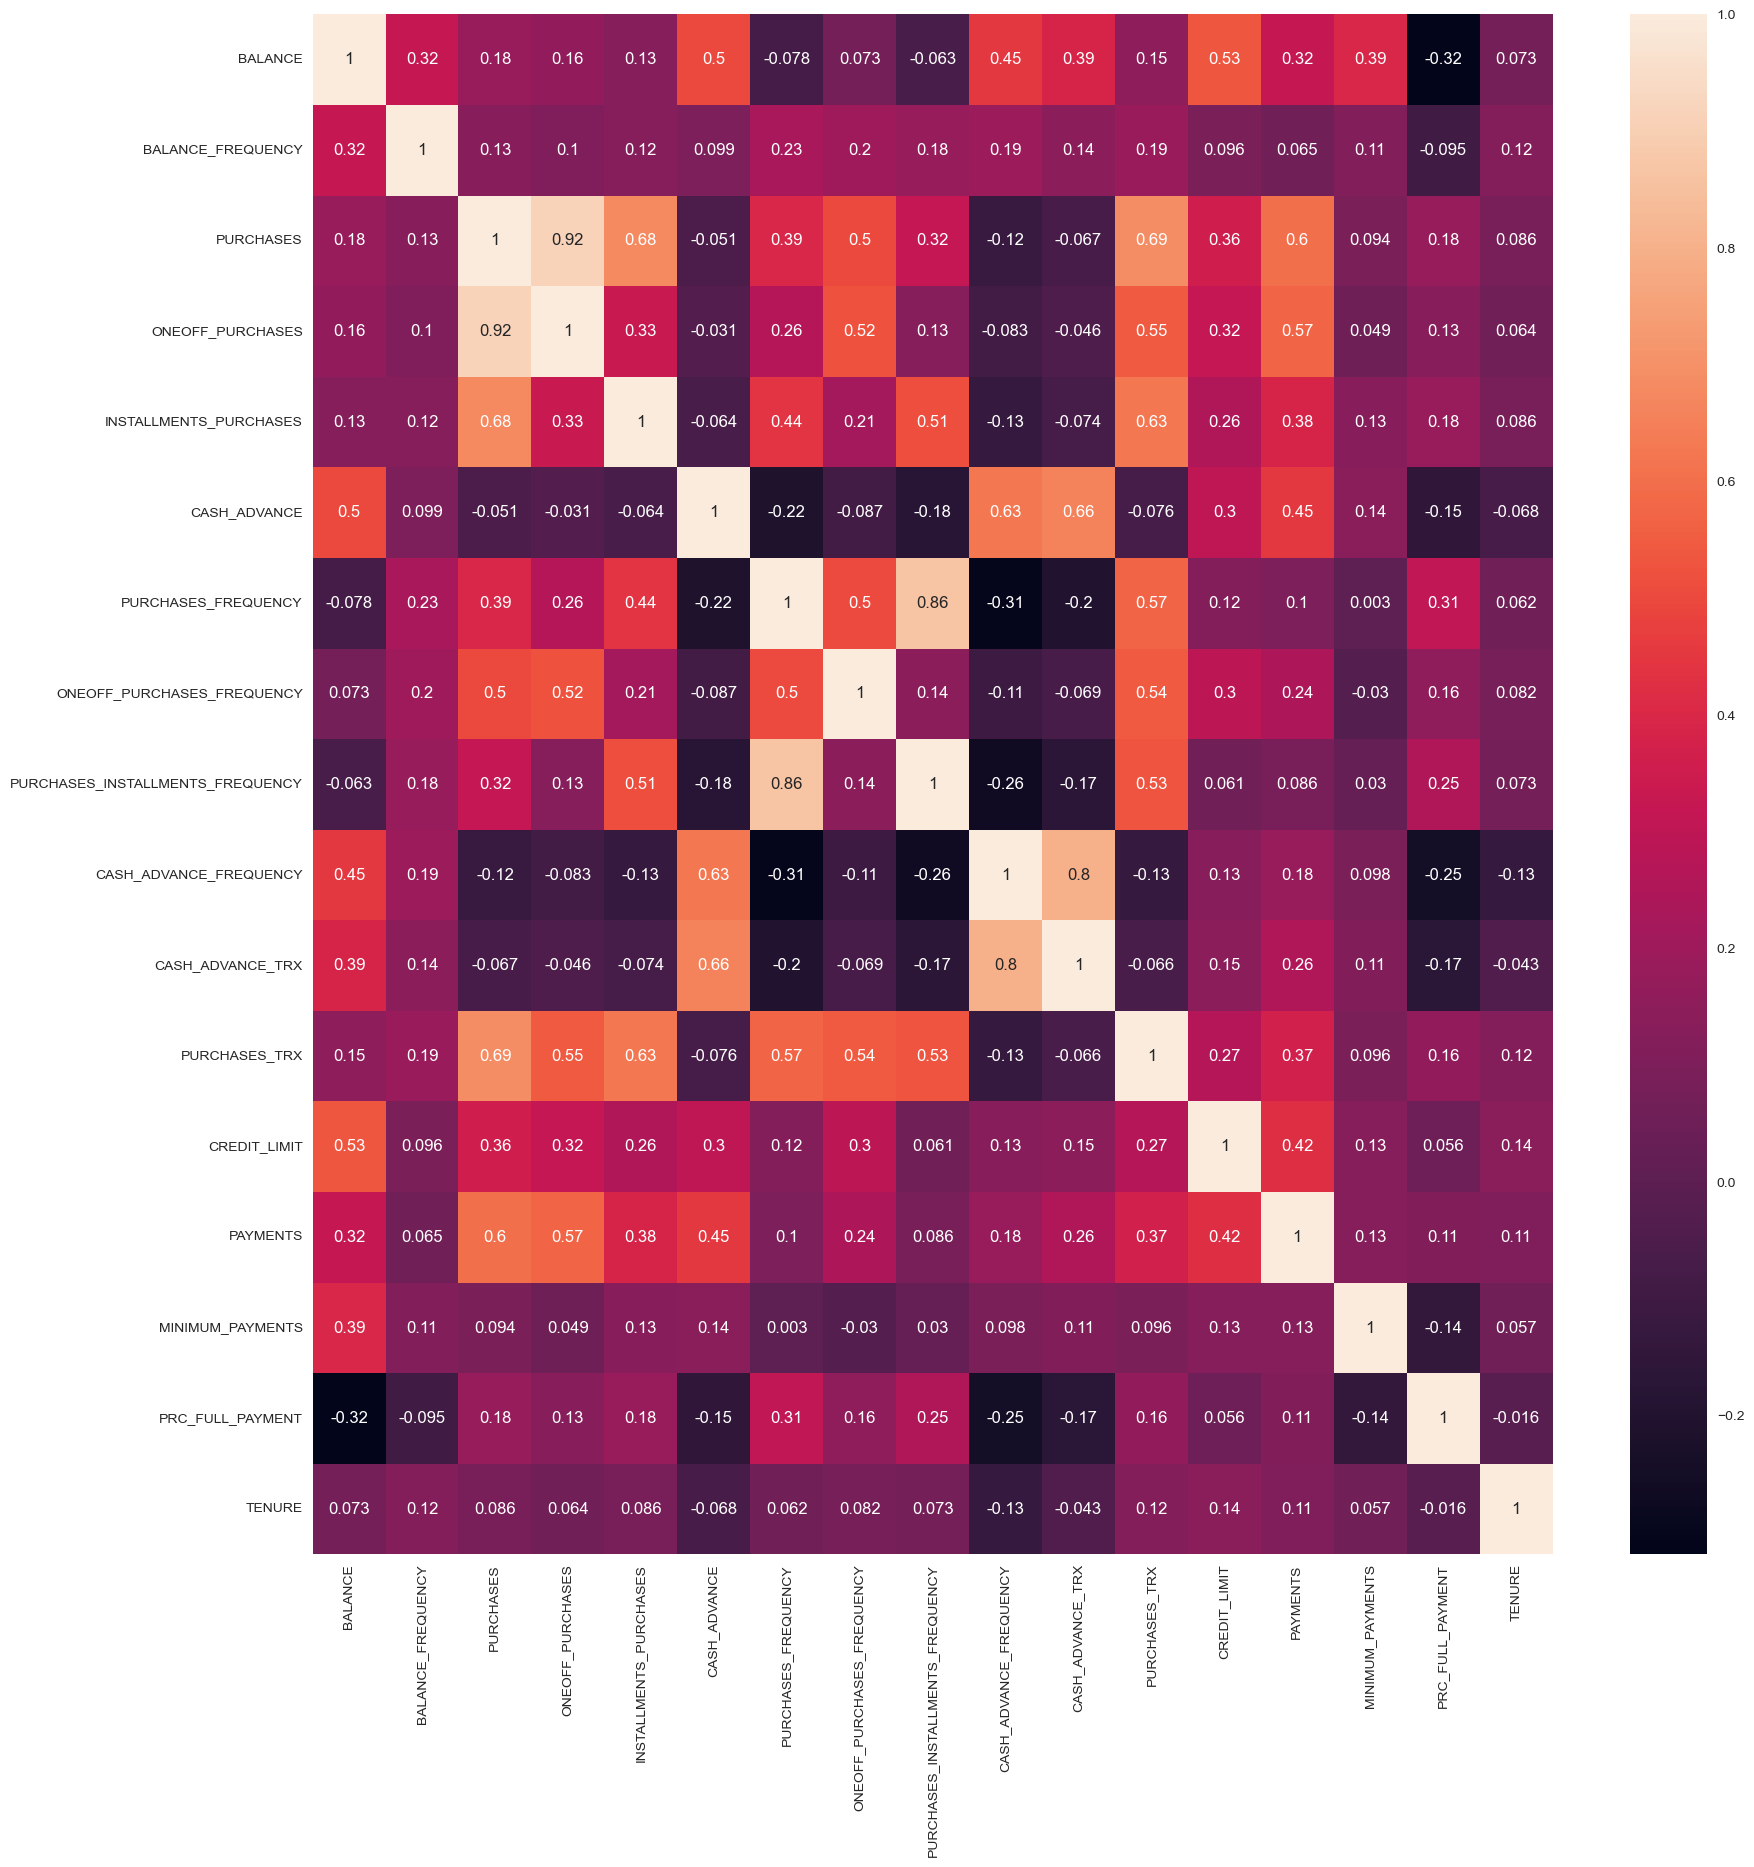

In [25]:
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(correlations, annot=True)

In [26]:
min(creditcard_df['BALANCE']), max(creditcard_df['BALANCE'])


(0.0, 19043.13856)

In [27]:
scaler = StandardScaler()
creditcard_df_scaled = scaler.fit_transform(creditcard_df)


In [28]:
type(creditcard_df_scaled), type(creditcard_df)


(numpy.ndarray, pandas.core.frame.DataFrame)

In [29]:
min(creditcard_df_scaled[0]), max(creditcard_df_scaled[0])


(-0.9604333444542572, 0.36067954425377496)

In [30]:
creditcard_df_scaled


array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.31096755,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.08931021,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.10166318,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.33546549,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.34690648,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.33294642,
        -0.52555097, -4.12276757]])

In [31]:
wcss_1 = []
range_values = range(1, 20)
for i in range_values:
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(creditcard_df_scaled)
  wcss_1.append(kmeans.inertia_)

In [32]:
print(wcss_1)


[152149.99999999994, 128957.909553381, 112651.54764901493, 99074.82362560667, 91502.98259428907, 86398.70393107586, 81312.95674503293, 77059.90559370698, 73502.28133793219, 70873.80733783504, 64140.09588176699, 61407.387108848015, 59175.54484365137, 58987.86259634237, 56581.727525242226, 54581.556491305644, 53614.726286081095, 53411.772221956875, 51015.82944351386]


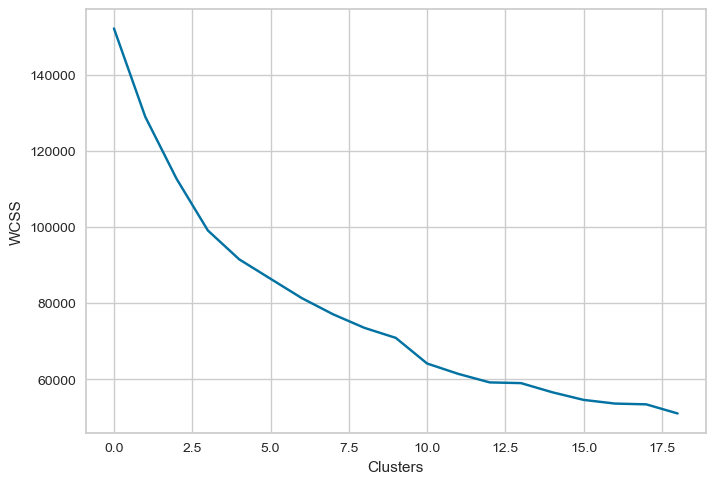

In [33]:
plt.plot(wcss_1, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

Elbow Method to determine the number of clusters to be formed:


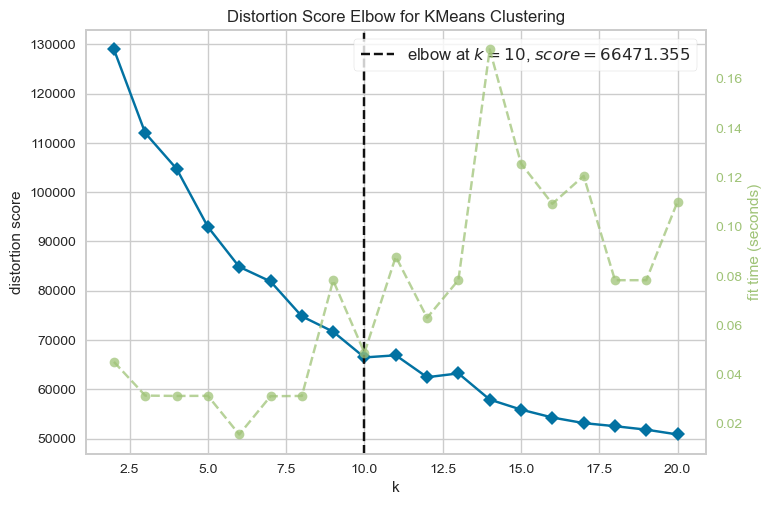

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [34]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=20)
Elbow_M.fit(creditcard_df_scaled)
Elbow_M.show()

In [35]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

In [36]:
labels, len(labels)


(array([0, 8, 4, ..., 7, 7, 7]), 8950)

In [37]:
np.unique(labels, return_counts=True)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([2494,  700,  120, 1592, 1018, 1088,  316,  598, 1001,   23],
       dtype=int64))

In [38]:
kmeans.cluster_centers_


array([[-7.65445579e-02,  3.97524353e-01, -3.56067020e-01,
        -2.36274945e-01, -4.07698189e-01, -1.55772162e-01,
        -8.58801502e-01, -3.74756421e-01, -7.78826465e-01,
         1.42258366e-02, -9.82139699e-02, -4.83845617e-01,
        -3.60295454e-01, -2.68163810e-01, -6.49110041e-02,
        -4.49415818e-01,  2.74689881e-01],
       [-7.05066622e-01,  4.85265495e-02, -2.19318357e-02,
        -2.57486718e-01,  4.20601194e-01, -4.56380316e-01,
         8.72367110e-01, -4.07419847e-01,  1.03637893e+00,
        -6.55815986e-01, -4.66440314e-01,  8.79983723e-02,
        -1.21113507e-01, -2.25678284e-01, -2.91408343e-01,
         2.13931317e+00,  1.08752516e-01],
       [ 1.86602077e+00,  2.75177037e-01,  1.06122996e-01,
         1.08405873e-01,  5.14235615e-02,  4.98958059e+00,
        -2.44274261e-01,  6.29400827e-03, -1.79728451e-01,
         2.44158875e+00,  3.99205453e+00,  4.96860466e-03,
         1.49244730e+00,  3.80713868e+00,  6.30857593e-01,
        -1.22154107e-01,  1.8

In [39]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.076545,0.397524,-0.356067,-0.236275,-0.407698,-0.155772,-0.858802,-0.374756,-0.778826,0.014226,-0.098214,-0.483846,-0.360295,-0.268164,-0.064911,-0.449416,0.274690
1,-0.705067,0.048527,-0.021932,-0.257487,0.420601,-0.456380,0.872367,-0.407420,1.036379,-0.655816,-0.466440,0.087998,-0.121114,-0.225678,-0.291408,2.139313,0.108753
2,1.866021,0.275177,0.106123,0.108406,0.051424,4.989581,-0.244274,0.006294,-0.179728,2.441589,3.992055,0.004969,1.492447,3.807139,0.630858,-0.122154,0.018194
3,-0.203323,0.370703,-0.023916,-0.201070,0.312780,-0.321479,0.951193,-0.289273,1.150277,-0.396870,-0.313242,0.218794,-0.279916,-0.185767,0.067288,-0.345875,0.281825
4,-0.142509,0.407401,0.605475,0.749721,0.054102,-0.336769,1.012917,2.012566,0.161758,-0.428841,-0.341913,0.679245,0.461264,0.177542,-0.162624,0.446496,0.278468
5,-0.698182,-2.227282,-0.319454,-0.232747,-0.327588,-0.306668,-0.601530,-0.443020,-0.479551,-0.504874,-0.366437,-0.430427,-0.180316,-0.199664,-0.251240,0.110514,0.195847
6,1.101738,0.480315,2.608838,1.876635,2.721027,-0.159724,1.174831,1.607127,1.292770,-0.281459,-0.164913,3.297401,1.332960,1.444782,0.610500,0.225272,0.334668
7,-0.328420,-0.365063,-0.291037,-0.207991,-0.305635,0.079861,-0.241599,-0.277335,-0.268798,0.331442,0.011321,-0.394945,-0.565624,-0.392308,-0.207985,-0.067356,-3.229327
8,1.492751,0.418427,-0.279885,-0.203374,-0.288202,1.299007,-0.580433,-0.278834,-0.502858,1.648323,1.386737,-0.337466,0.819707,0.273136,0.528385,-0.445054,0.109857
9,1.865907,0.332878,12.596844,13.111182,5.696389,-0.004178,1.033322,2.170634,0.866221,-0.476183,-0.214854,4.566558,3.174197,8.991136,1.064817,1.236317,0.295702


In [40]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [creditcard_df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1405.153792,0.971441,242.462157,200.269354,42.391231,652.209613,0.145672,0.090661,0.054912,0.137991,2.578589,2.683240,3183.547180,956.835898,712.934185,0.022268,11.884924
1,96.938169,0.888766,956.347129,165.062157,791.412086,21.820270,0.840474,0.080916,0.776321,0.003909,0.065714,16.897143,4053.788961,1079.827334,185.091691,0.779427,11.662857
2,5448.439540,0.942458,1229.938250,772.368917,457.569333,11442.254688,0.392311,0.204335,0.293009,0.623731,30.491667,14.833333,9924.583333,12754.437284,2334.393551,0.117987,11.541667
3,1141.274630,0.965087,952.108090,258.702148,693.911156,304.713916,0.872110,0.116162,0.821587,0.055727,1.111181,20.148241,3476.000584,1195.365688,1021.019161,0.052552,11.894472
4,1267.854247,0.973780,2296.811974,1836.820963,459.991012,272.650103,0.896883,0.802845,0.428724,0.049329,0.915521,31.593320,6172.718343,2247.111260,485.218858,0.284307,11.889980
5,111.267872,0.349648,320.686562,206.125230,114.834127,335.773052,0.248927,0.070296,0.173851,0.034114,0.748162,4.011029,3838.386438,1155.136778,278.703272,0.186038,11.779412
6,3857.650028,0.991053,6577.026804,3707.267025,2871.658513,643.921716,0.961867,0.681895,0.878217,0.078821,2.123418,96.670886,9344.303797,5915.647464,2286.951761,0.219603,11.965190
7,880.895945,0.790791,381.398813,247.215084,134.685401,1146.343651,0.393385,0.119723,0.257610,0.201469,3.326087,4.892977,2436.479012,597.451898,379.506510,0.134014,7.195652
8,4671.509076,0.976392,405.226444,254.878002,150.450010,3702.949235,0.257395,0.119276,0.164589,0.464990,12.712288,6.321678,7476.877668,2523.845397,2095.586069,0.023544,11.664336
9,5448.201718,0.956126,27916.555652,22354.314348,5562.241304,970.110470,0.905072,0.850000,0.708696,0.039855,1.782609,128.217391,16043.478261,27761.600386,3345.718254,0.515316,11.913043


In [41]:
labels, len(labels)


(array([0, 8, 4, ..., 7, 7, 7]), 8950)

In [42]:
creditcard_df_cluster = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,8
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


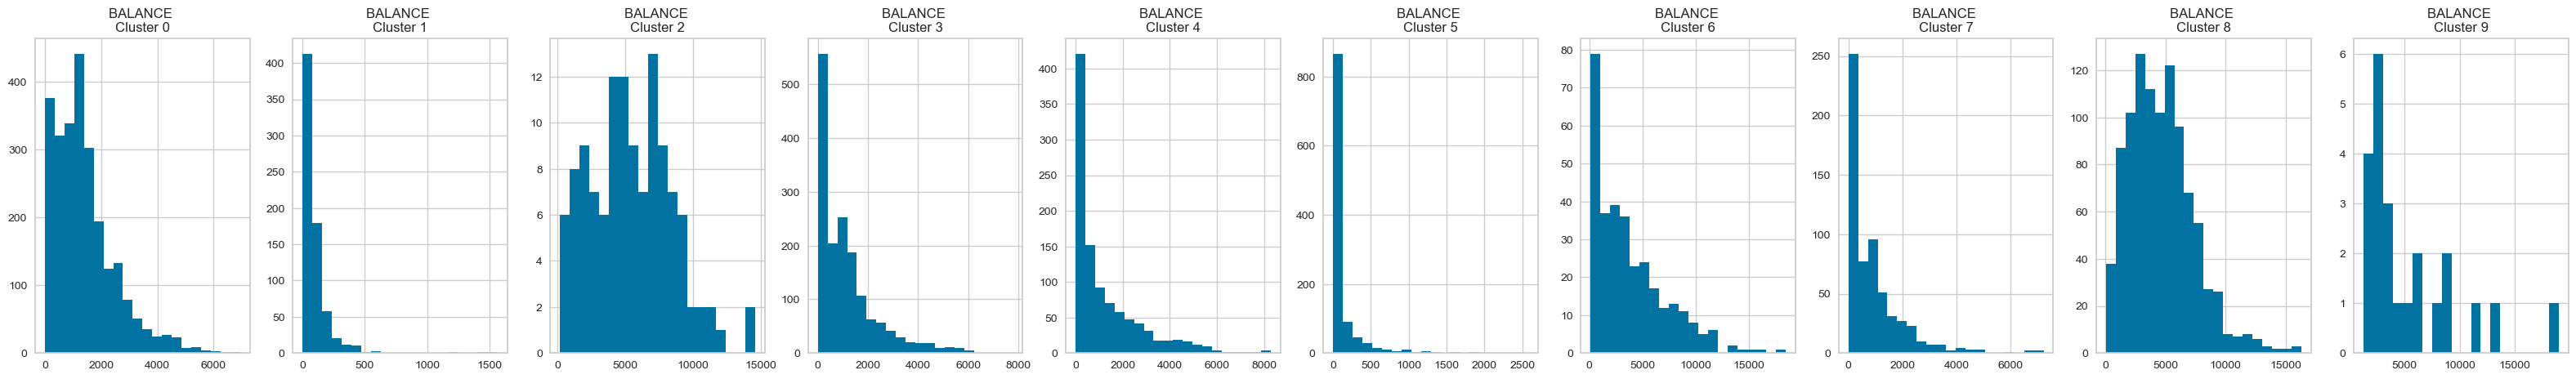

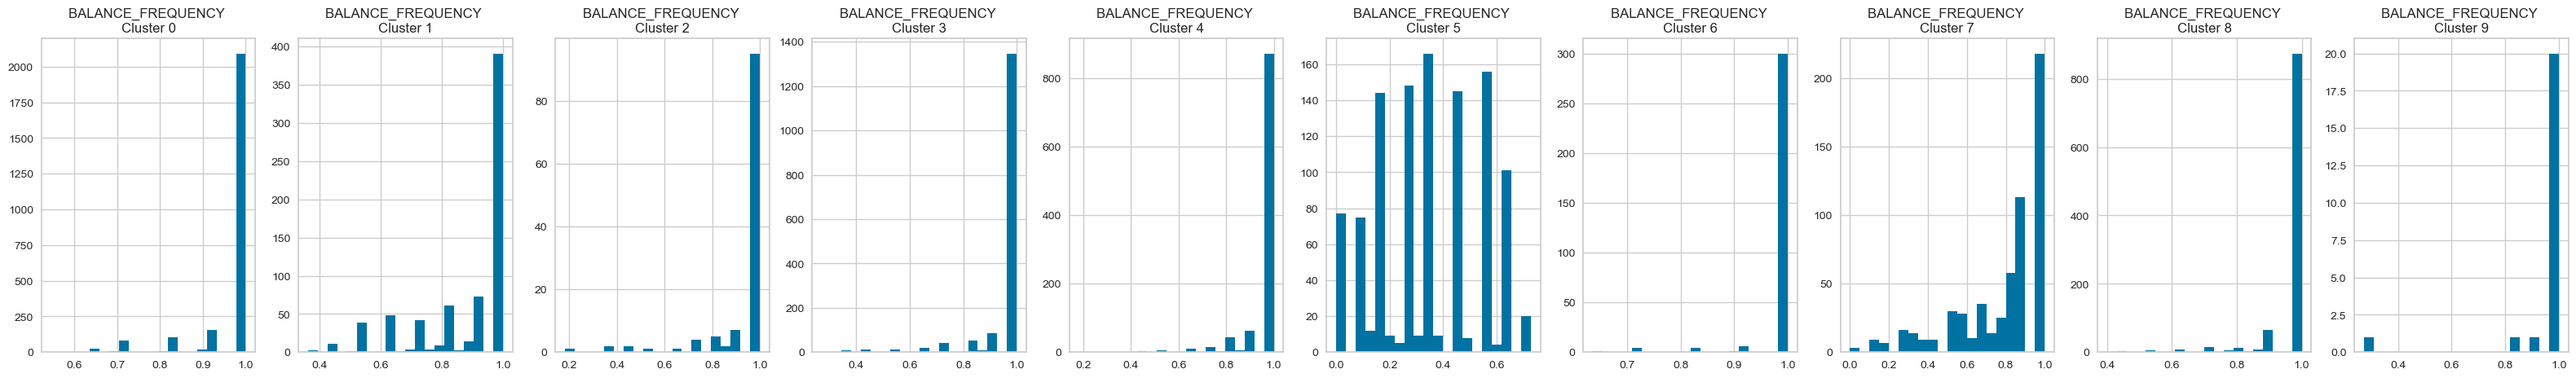

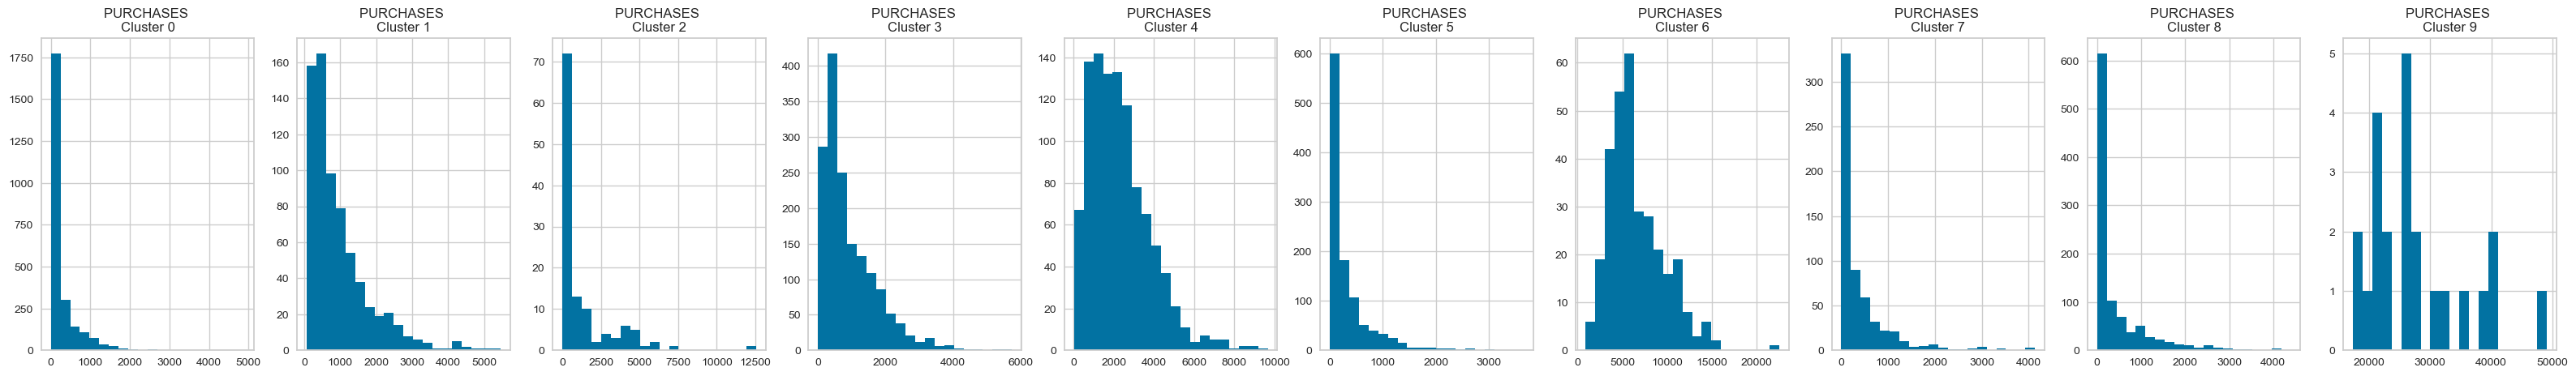

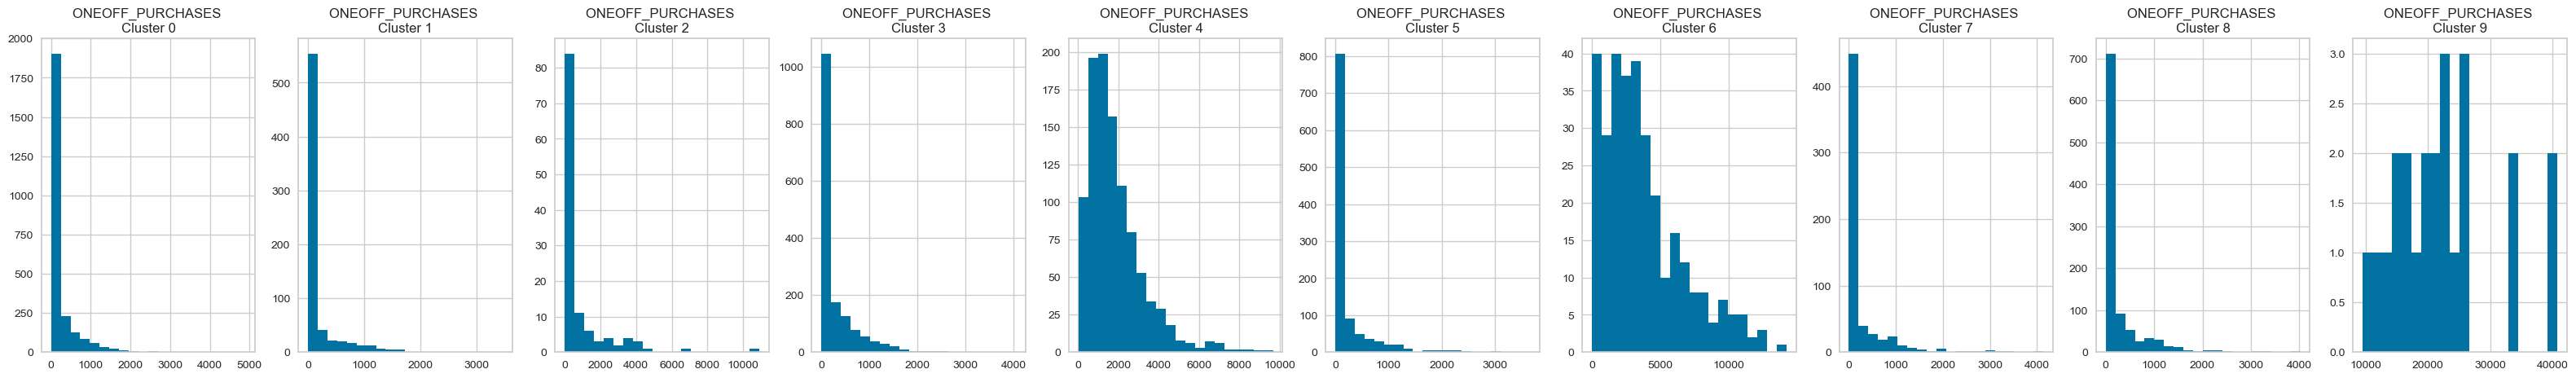

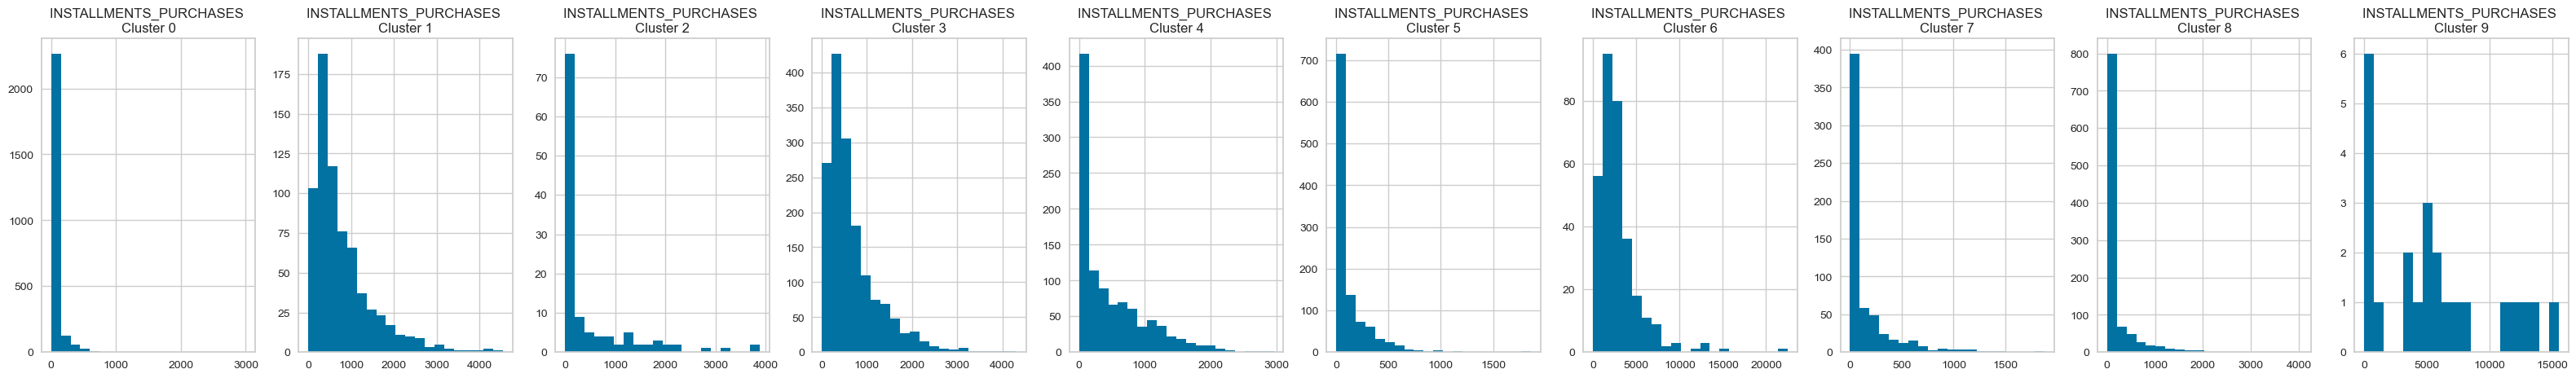

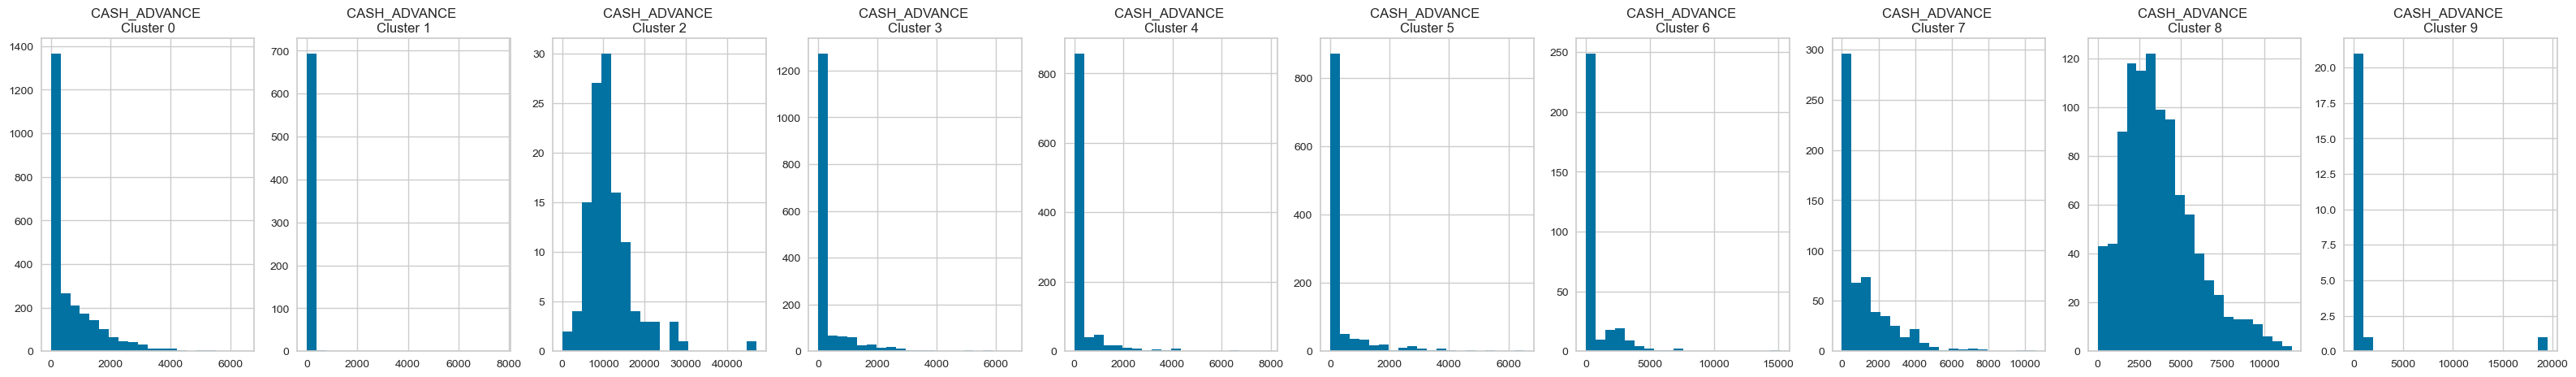

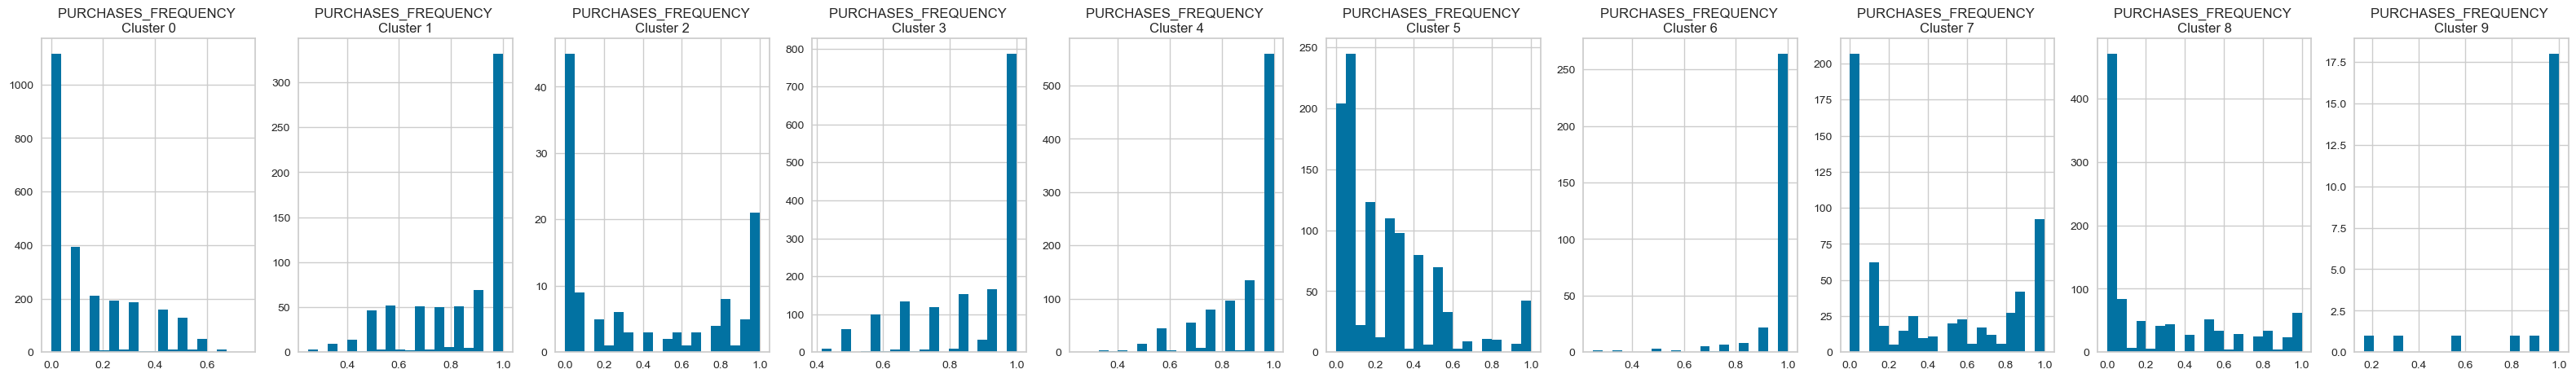

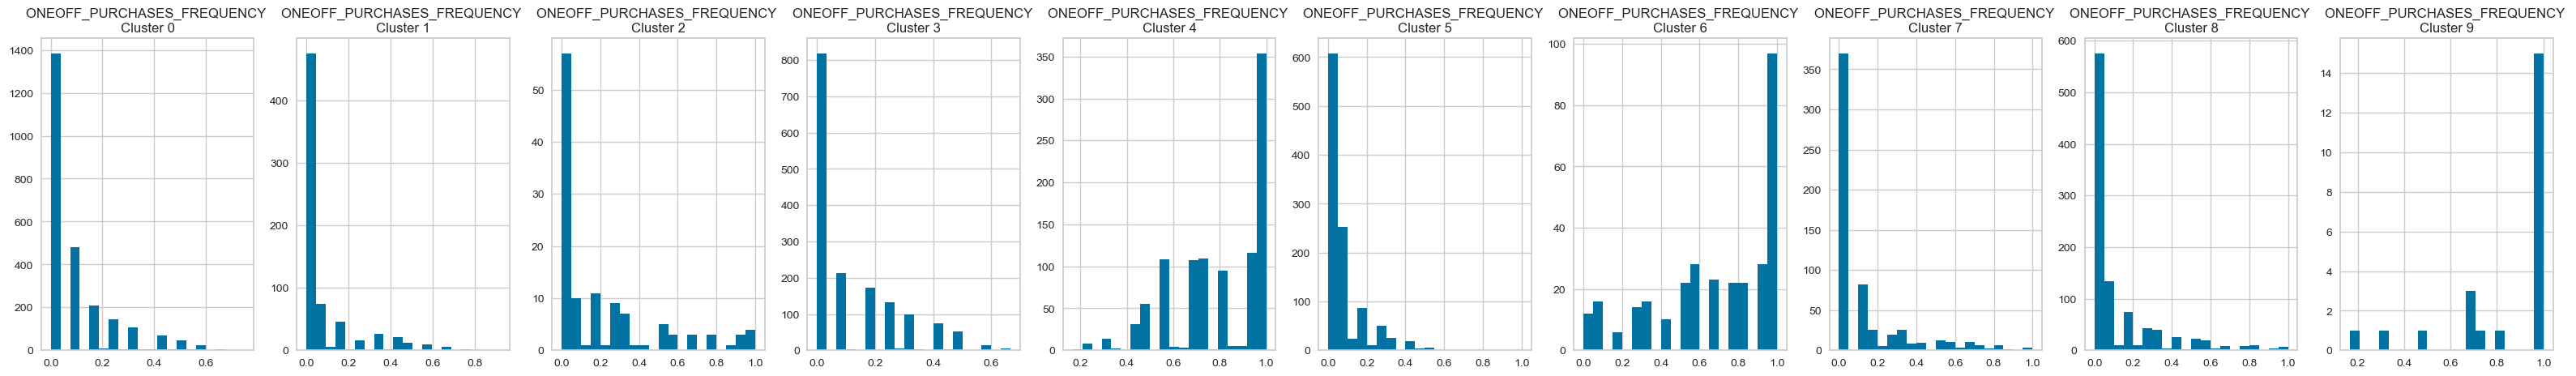

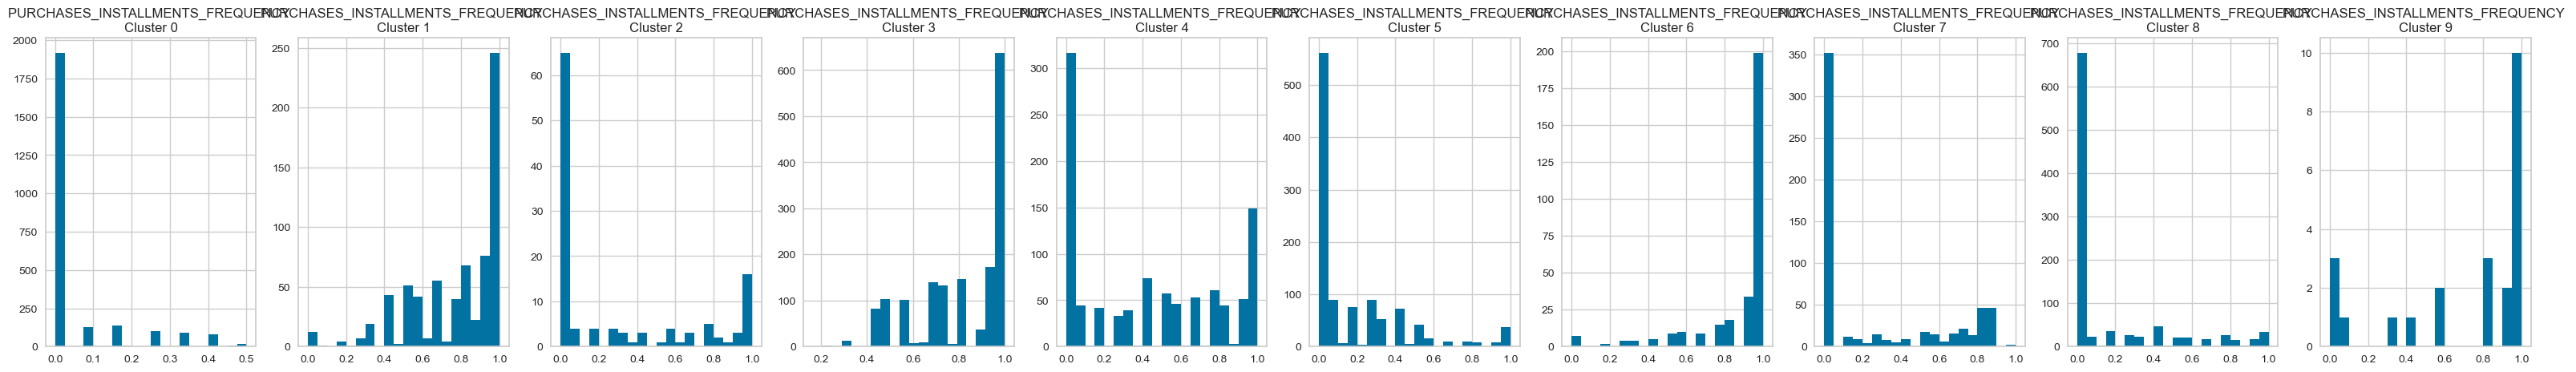

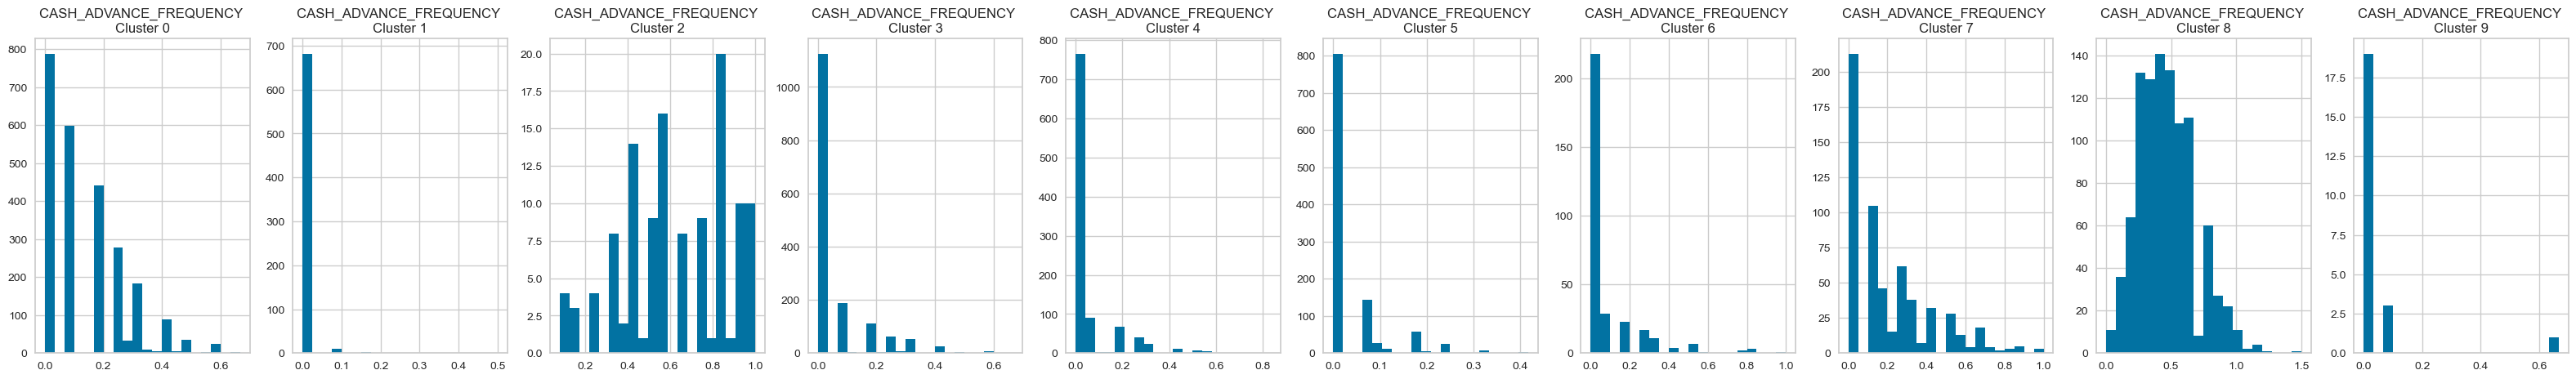

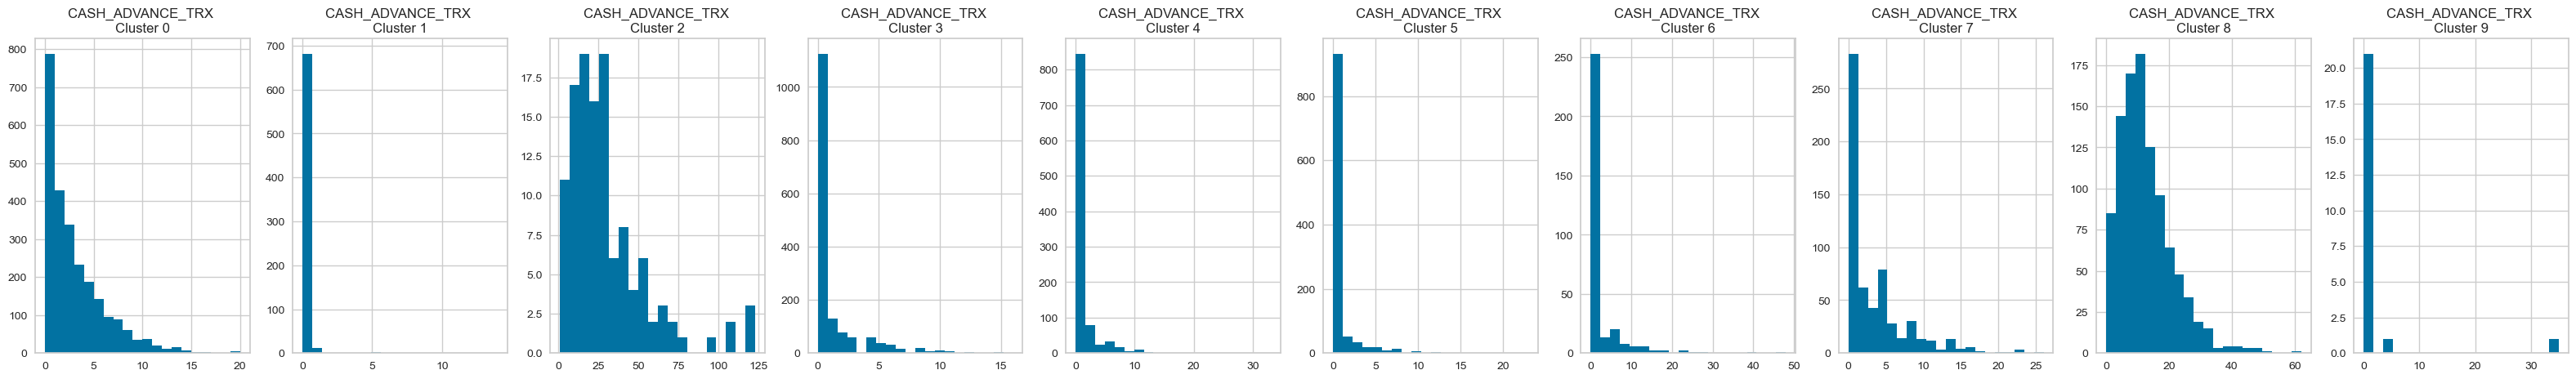

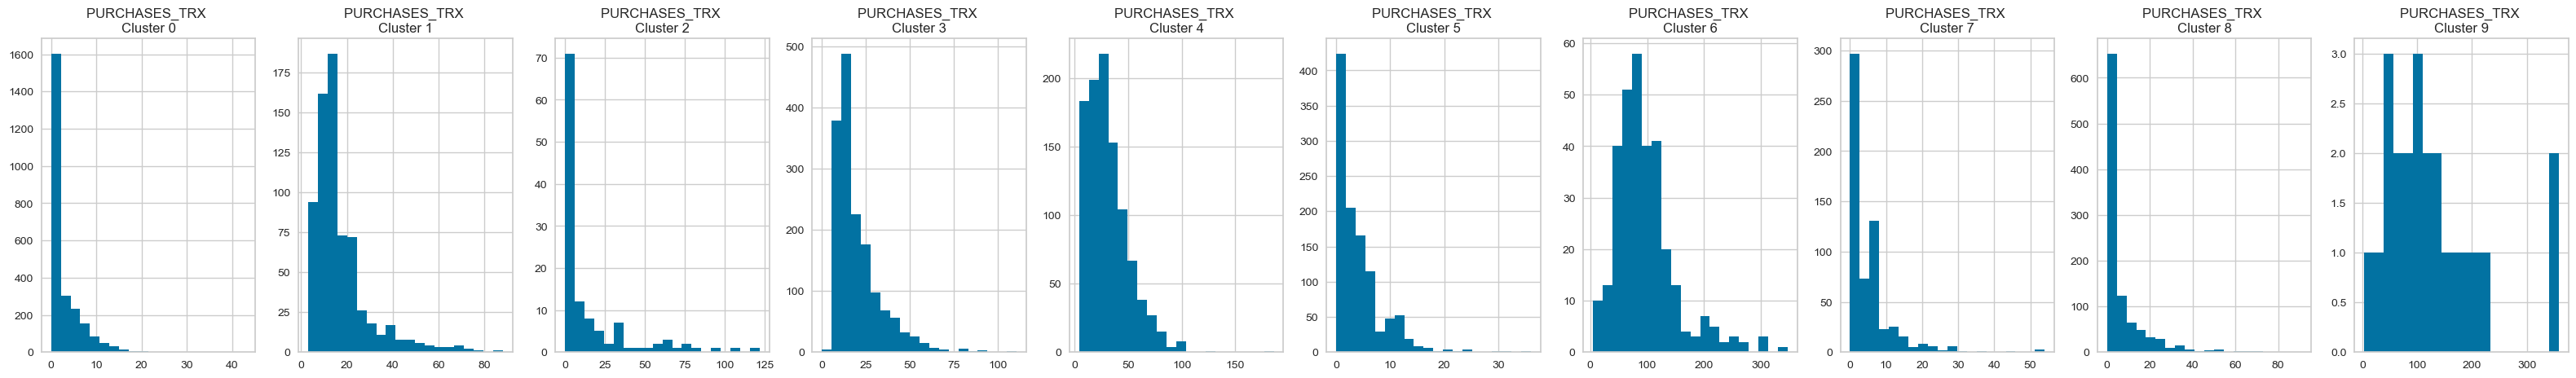

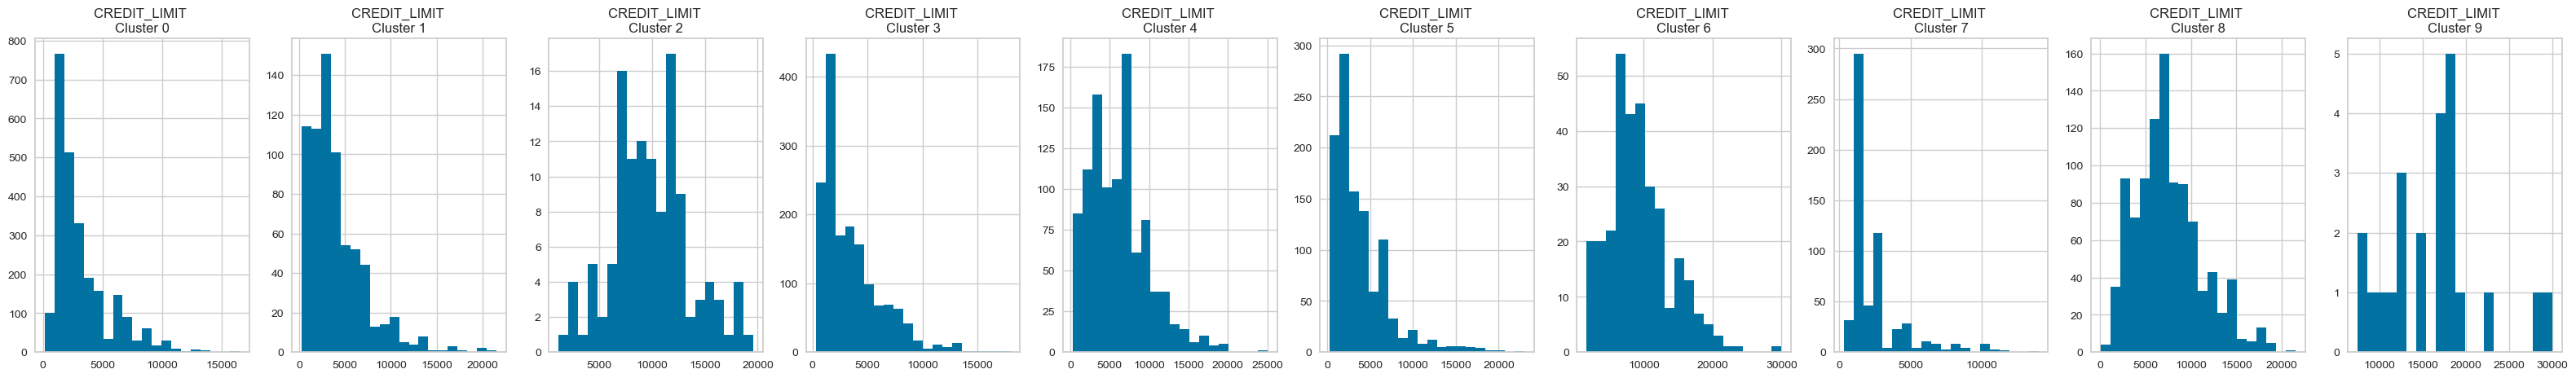

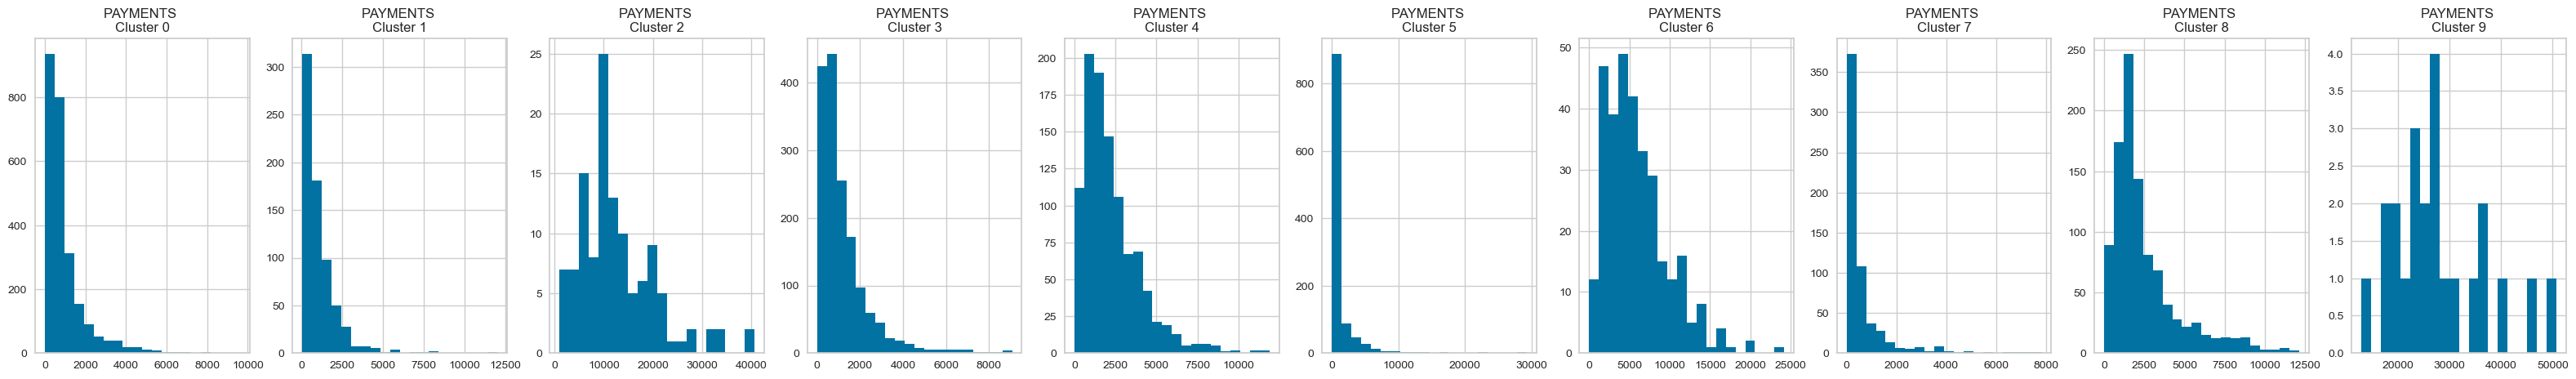

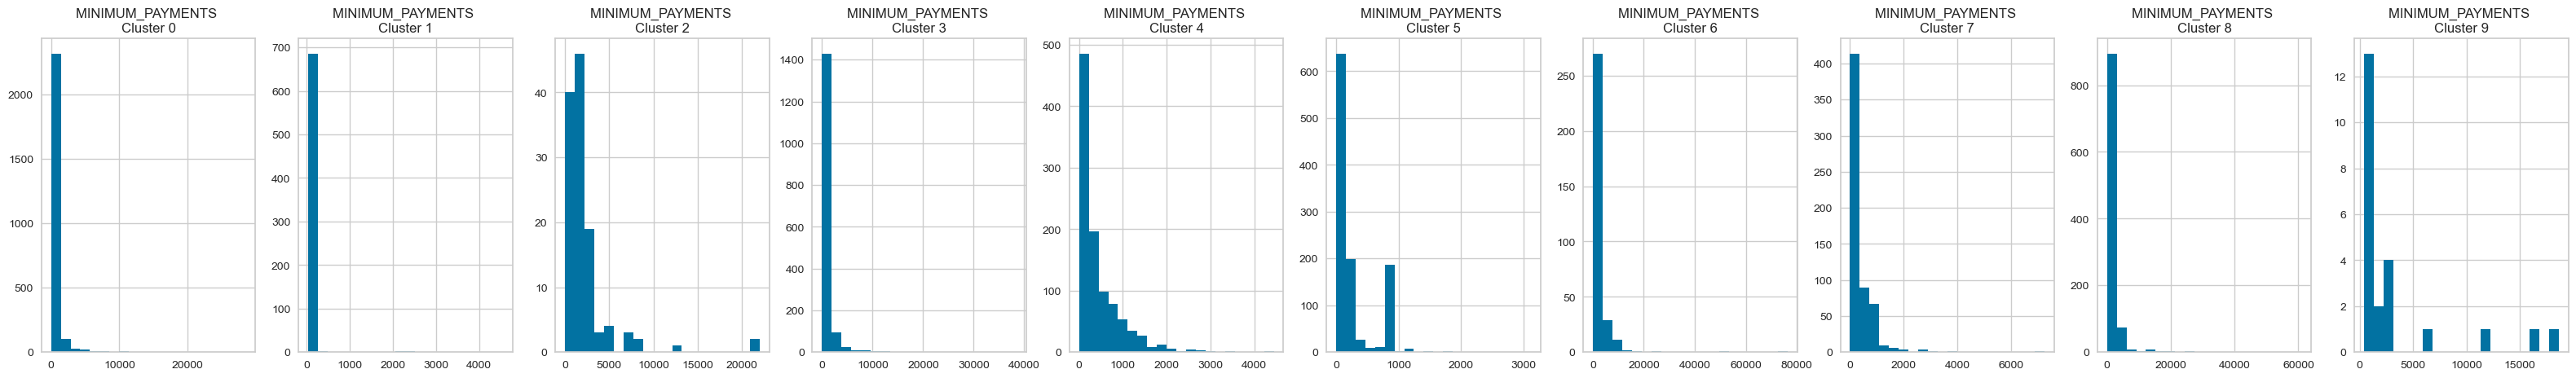

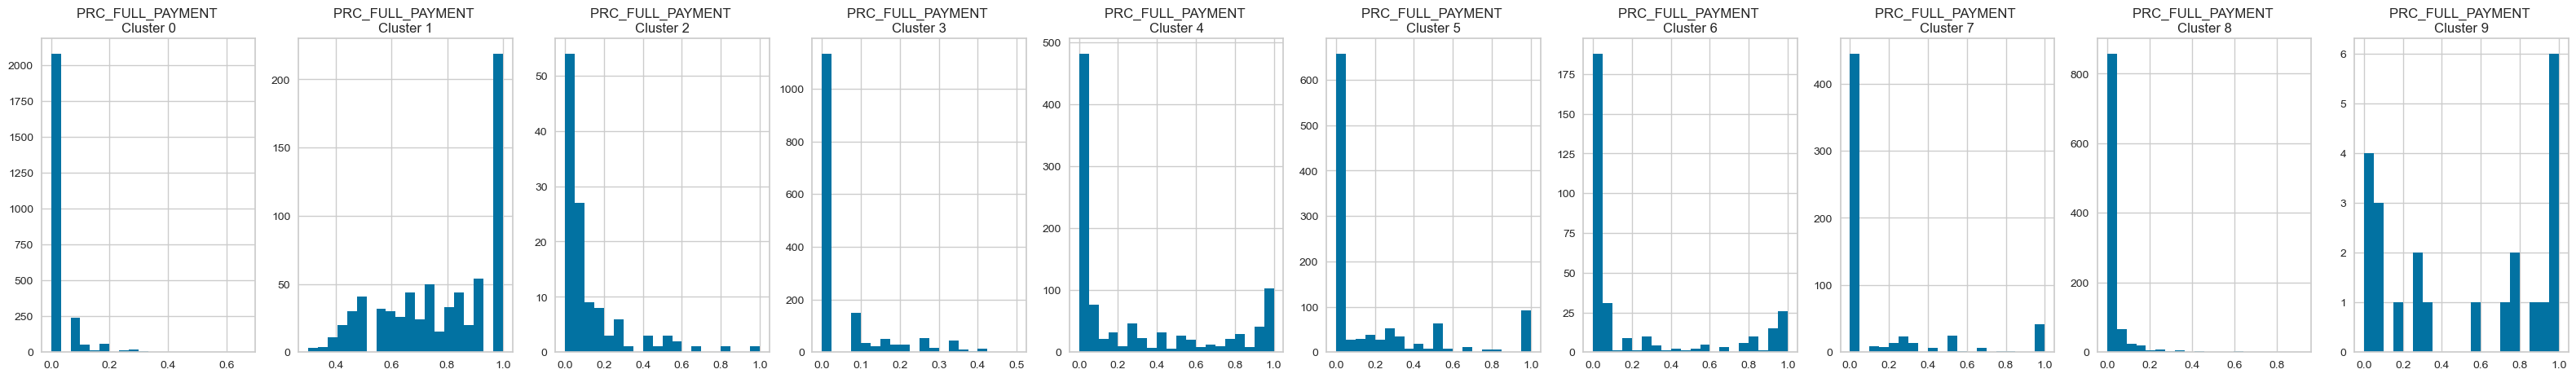

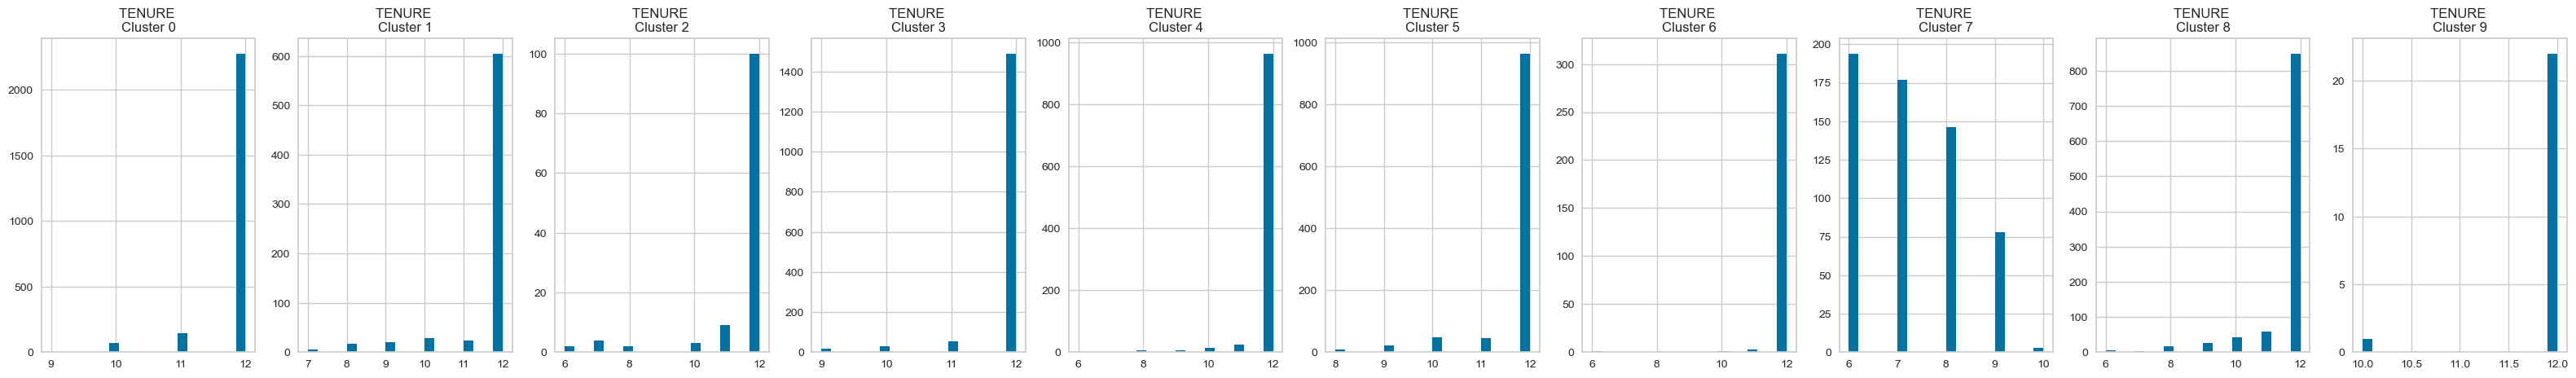

In [43]:
for i in creditcard_df.columns:
  plt.figure(figsize=(40,5))
  for j in range(10):
    plt.subplot(1, 10, j + 1)
    cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
    cluster[i].hist(bins = 20)
    plt.title('{} \nCluster {}'.format(i, j))
  plt.show()

In [44]:
credit_ordered = creditcard_df_cluster.sort_values(by = 'cluster')
credit_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
3850,874.571604,1.000000,385.70,316.7,69.00,289.822557,0.416667,0.333333,0.166667,0.166667,2,8,2000.0,357.969443,231.854555,0.0,12,0
8235,535.927055,1.000000,0.00,0.0,0.00,562.957567,0.000000,0.000000,0.000000,0.166667,2,0,1200.0,598.924595,306.059548,0.0,12,0
3860,933.278656,1.000000,182.55,0.0,182.55,2304.727023,0.250000,0.000000,0.166667,0.416667,7,3,2500.0,1755.164590,248.144048,0.0,12,0
3863,1513.759633,1.000000,70.00,70.0,0.00,0.000000,0.181818,0.181818,0.000000,0.000000,0,2,1700.0,2085.049719,3812.357397,0.0,11,0


In [45]:
credit_ordered.tail()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
3652,8700.079439,1.000000,20421.59,16864.56,3557.03,0.000000,1.000000,1.000000,1.000000,0.000000,0,204,17000.0,13002.30393,2746.592199,0.083333,12,9
273,5131.319584,1.000000,32539.78,26547.43,5992.35,0.000000,1.000000,1.000000,1.000000,0.000000,0,98,11500.0,26652.34432,1971.129435,0.083333,12,9
7046,2980.054695,0.818182,26784.62,26514.32,270.30,0.000000,0.583333,0.500000,0.083333,0.000000,0,33,30000.0,30029.01496,11853.796130,0.750000,12,9
138,19043.138560,1.000000,22009.92,9449.07,12560.85,0.000000,1.000000,0.750000,1.000000,0.000000,0,216,18000.0,23018.57583,18621.013310,0.000000,12,9
3698,3012.178613,1.000000,27790.42,14605.99,13184.43,469.074937,1.000000,0.666667,1.000000,0.083333,1,79,12000.0,27839.82354,569.401398,0.727273,12,9


In [46]:
credit_ordered.to_csv('cluster.csv')


# PCA (principal component analysis)

In [47]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp

array([[-1.68222075, -1.07645012],
       [-1.13829474,  2.50647074],
       [ 0.96968454, -0.38350723],
       ...,
       [-0.92620448, -1.81078655],
       [-2.33655225, -0.65796733],
       [-0.55642085, -0.40046474]])

In [48]:
pca_df = pd.DataFrame(data = principal_comp, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.682221,-1.076450
1,-1.138295,2.506471
2,0.969685,-0.383507
3,-0.873628,0.043169
4,-1.599434,-0.688582


In [49]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()


,pca1,pca2,cluster
0,-1.682221,-1.076450,0
1,-1.138295,2.506471,8
2,0.969685,-0.383507,4
3,-0.873628,0.043169,0
4,-1.599434,-0.688582,0


C:\Users\himan\AppData\Local\Temp\ipykernel_8268\2428195558.py:2: UserWarning: 
The palette list has fewer values (8) than needed (10) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])


<Axes: xlabel='pca1', ylabel='pca2'>

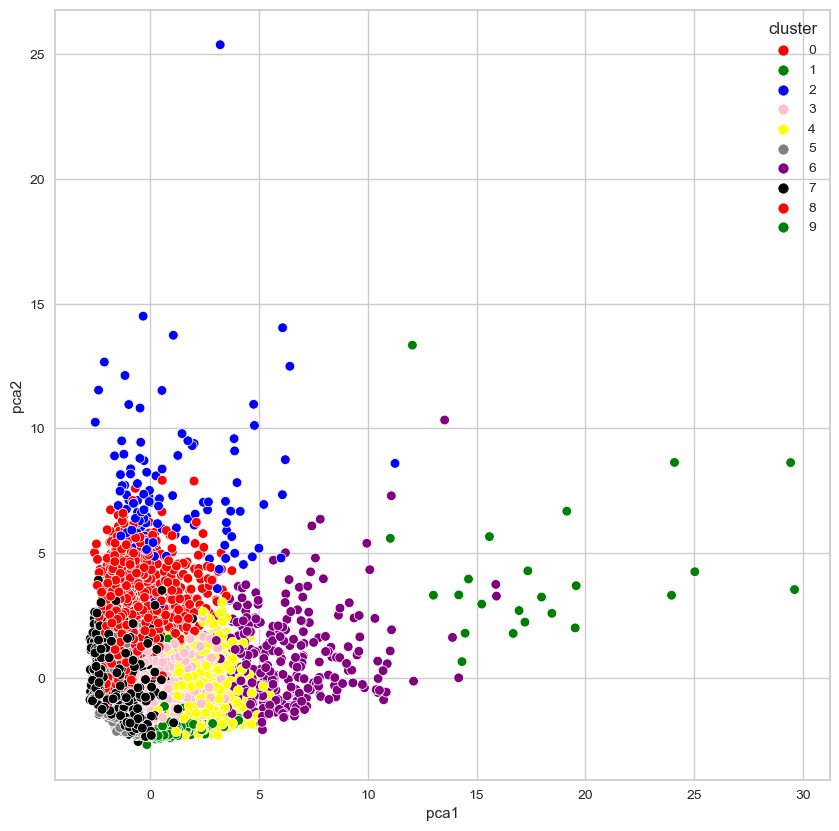

In [50]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink', 'yellow', 'gray', 'purple', 'black'])

# autoencoders

In [51]:
creditcard_df_scaled.shape


(8950, 17)

In [52]:
# 17 -> 500 -> 2000 -> 10 -> 2000 -> 500 -> 17
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model


In [53]:
input_df = Input(shape=(17,))
x = Dense(500, activation='relu')(input_df)
x = Dense(2000, activation='relu')(x)

encoded = Dense(10, activation='relu')(x)

x = Dense(2000, activation='relu')(encoded)
x = Dense(500, activation='relu')(x)

decoded = Dense(17)(x)


In [54]:
autoencoder = Model(input_df, decoded)


In [55]:
encoder = Model(input_df, encoded)


In [56]:
autoencoder.compile(optimizer = 'Adam', loss = 'mean_squared_error')


In [57]:
autoencoder.fit(creditcard_df_scaled, creditcard_df_scaled, epochs = 50)


Epoch 1/50

280/280 [==============================] - 11s 31ms/step - loss: 0.1883
Epoch 2/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0684
Epoch 3/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0565
Epoch 4/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0392
Epoch 5/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0573
Epoch 6/50
280/280 [==============================] - 9s 31ms/step - loss: 0.0434
Epoch 7/50
280/280 [==============================] - 9s 30ms/step - loss: 0.0360
Epoch 8/50
280/280 [==============================] - 9s 32ms/step - loss: 0.0351
Epoch 9/50
280/280 [==============================] - 8s 28ms/step - loss: 0.0356
Epoch 10/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0230
Epoch 11/50
280/280 [==============================] - 8s 30ms/step - loss: 0.0353
Epoch 12/50
280/280 [==============================] - 8s 29ms/step - loss: 0.0333
Epoch 13/50

In [58]:
creditcard_df_scaled.shape


(8950, 17)

In [59]:
compact = encoder.predict(creditcard_df_scaled)


280/280 [==============================] - 1s 3ms/step


In [60]:
compact.shape


(8950, 10)

In [61]:
creditcard_df_scaled[0]


array([-0.73198937, -0.24943448, -0.42489974, -0.35693402, -0.34907882,
       -0.46678555, -0.80649035, -0.67866081, -0.70731317, -0.67534886,
       -0.47606982, -0.51133325, -0.96043334, -0.52897879, -0.31096755,
       -0.52555097,  0.36067954])

In [62]:
compact[0]


array([0.14328346, 0.        , 0.6316845 , 0.1499172 , 0.27709046,
       0.03417223, 0.21087903, 0.        , 0.56146   , 0.95801246],
      dtype=float32)

In [63]:
wcss_2 = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(compact)
    wcss_2.append(kmeans.inertia_)

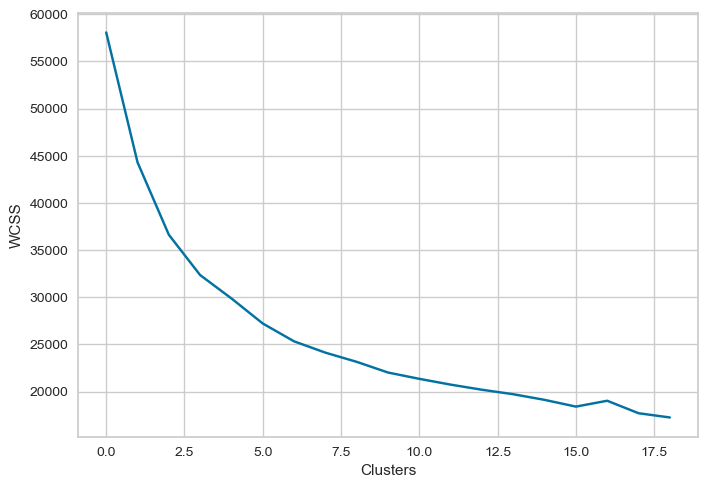

In [64]:
plt.plot(wcss_2, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

C:\Users\himan\AppData\Local\Temp\ipykernel_8268\1332322834.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_1, 'bx-', color = 'r')
C:\Users\himan\AppData\Local\Temp\ipykernel_8268\1332322834.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_2, 'bx-', color = 'g');


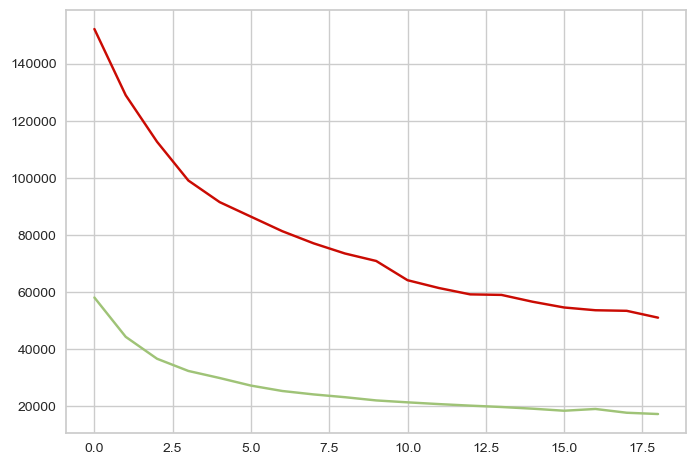

In [65]:
plt.plot(wcss_1, 'bx-', color = 'r')
plt.plot(wcss_2, 'bx-', color = 'g');

C:\Users\himan\AppData\Local\Temp\ipykernel_8268\281201215.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bx-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(wcss_2, 'bx-', color = 'g');


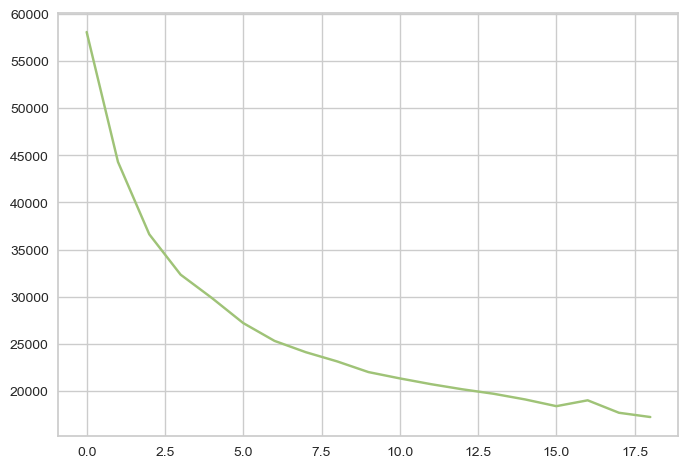

In [66]:
plt.plot(wcss_2, 'bx-', color = 'g');

In [67]:
labels = kmeans.labels_
labels, labels.shape

(array([ 0,  7, 15, ...,  9,  9,  9]), (8950,))

In [68]:
df_cluster_at = pd.concat([creditcard_df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_at.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,7
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,15
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,13
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0


In [69]:
pca = PCA(n_components = 2)
prin_comp = pca.fit_transform(compact)
pca_df = pd.DataFrame(data = prin_comp, columns = ['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,-1.172899,-0.269871
1,0.280341,1.264622
2,-0.610292,-0.458181
3,-0.326944,-0.271458
4,-1.212460,-0.243388


In [70]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.172899,-0.269871,0
1,0.280341,1.264622,7
2,-0.610292,-0.458181,15
3,-0.326944,-0.271458,13
4,-1.212460,-0.243388,0


C:\Users\himan\AppData\Local\Temp\ipykernel_8268\3624821664.py:2: UserWarning: 
The palette list has fewer values (4) than needed (19) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])


<Axes: xlabel='pca1', ylabel='pca2'>

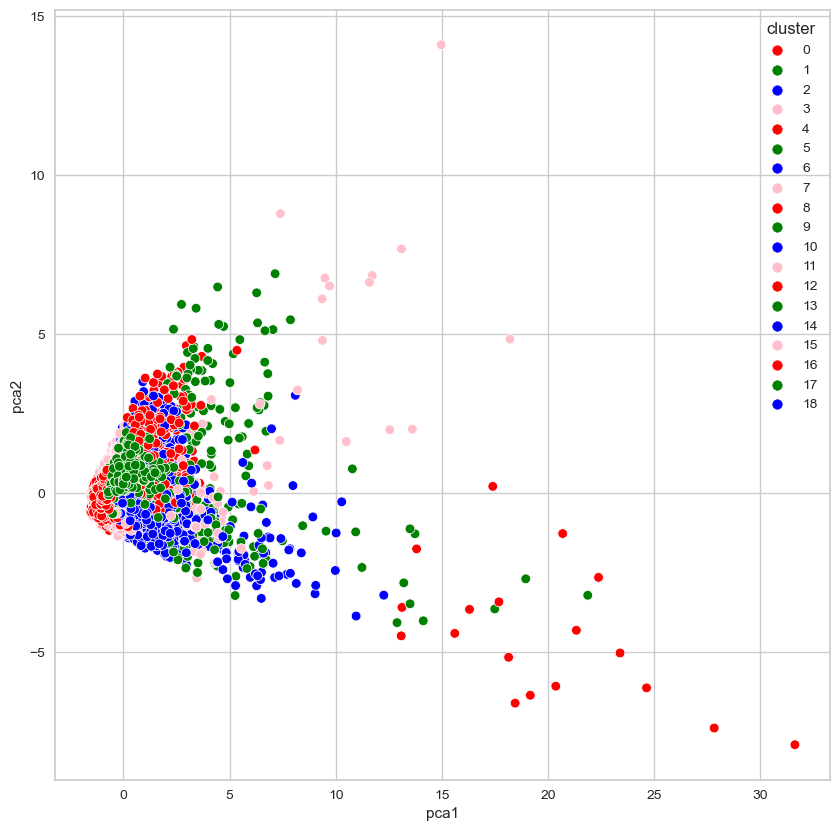

In [71]:
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'pink'])

In [72]:
df_cluster_ordered = df_cluster_at.sort_values(by = 'cluster')
df_cluster_ordered.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.0,12,0
1818,3541.960207,1.000000,0.00,0.00,0.00,1853.517071,0.000000,0.000000,0.000000,0.166667,2,0,4000.0,789.692304,941.569000,0.0,12,0
3295,1132.615315,1.000000,136.19,136.19,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,2,5100.0,346.986446,407.889131,0.0,12,0
1820,2447.783112,1.000000,431.96,290.00,141.96,0.000000,0.583333,0.166667,0.416667,0.000000,0,9,2500.0,740.165746,1096.264703,0.0,12,0
3293,305.506746,1.000000,0.00,0.00,0.00,381.399683,0.000000,0.000000,0.000000,0.333333,4,0,6000.0,402.200140,180.815649,0.0,12,0


In [73]:
df_cluster_ordered.tail()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
1791,291.991838,1.0,2971.56,1671.60,1299.96,0.0,0.916667,0.333333,0.833333,0.0,0,31,13500.0,2238.594868,171.648662,1.000000,12,18
4950,468.294595,1.0,4164.14,3215.54,948.60,0.0,1.000000,1.000000,1.000000,0.0,0,53,4000.0,3958.926162,203.066713,1.000000,12,18
6435,453.347636,1.0,4164.80,159.40,4005.40,0.0,1.000000,0.166667,1.000000,0.0,0,51,5500.0,4663.191280,168.550395,1.000000,12,18
771,432.915949,1.0,4430.17,3628.67,801.50,0.0,1.000000,1.000000,1.000000,0.0,0,78,8500.0,4301.600928,186.739077,1.000000,12,18
1616,502.653982,1.0,4748.50,1845.75,2902.75,0.0,1.000000,1.000000,1.000000,0.0,0,82,12000.0,4517.823754,205.244926,0.583333,12,18
